In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py


--2025-04-11 05:12:15--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-04-11 05:12:15 (42.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves

(np.float64(-0.5), np.float64(639.5), np.float64(426.5), np.float64(-0.5))

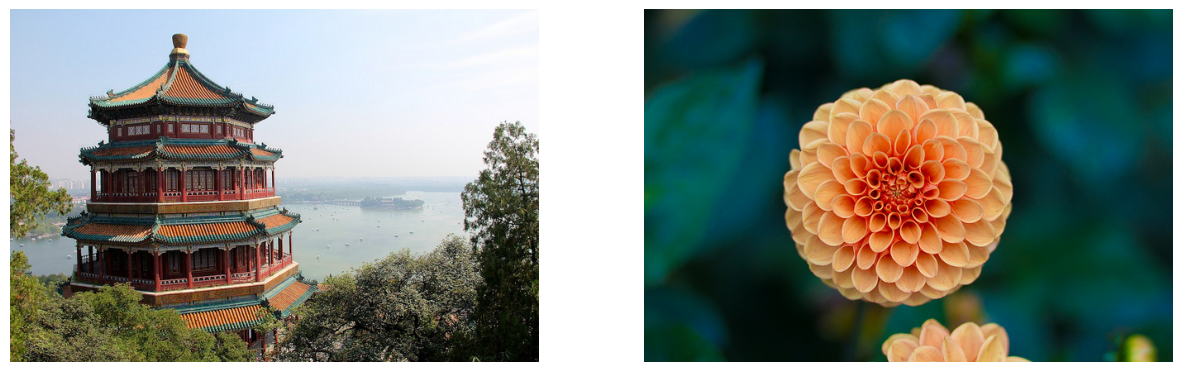

In [ ]:
images = load_sample_images()['images']
plt.figure(figsize = (15, 10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')

(np.float64(-0.5), np.float64(119.5), np.float64(69.5), np.float64(-0.5))

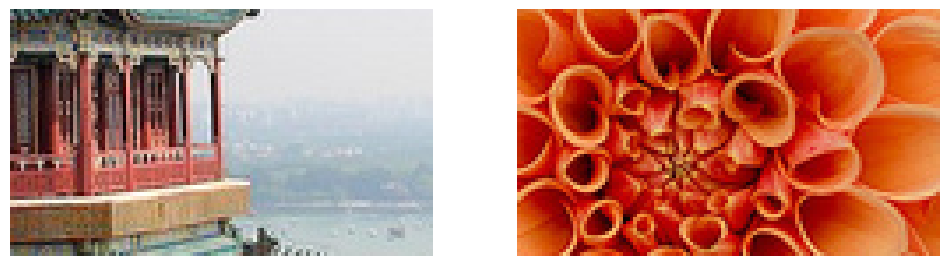

In [ ]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale = 1/255.)(images)
plt.figure(figsize = (12, 8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')


In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size = 2)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 69, 119, 32])

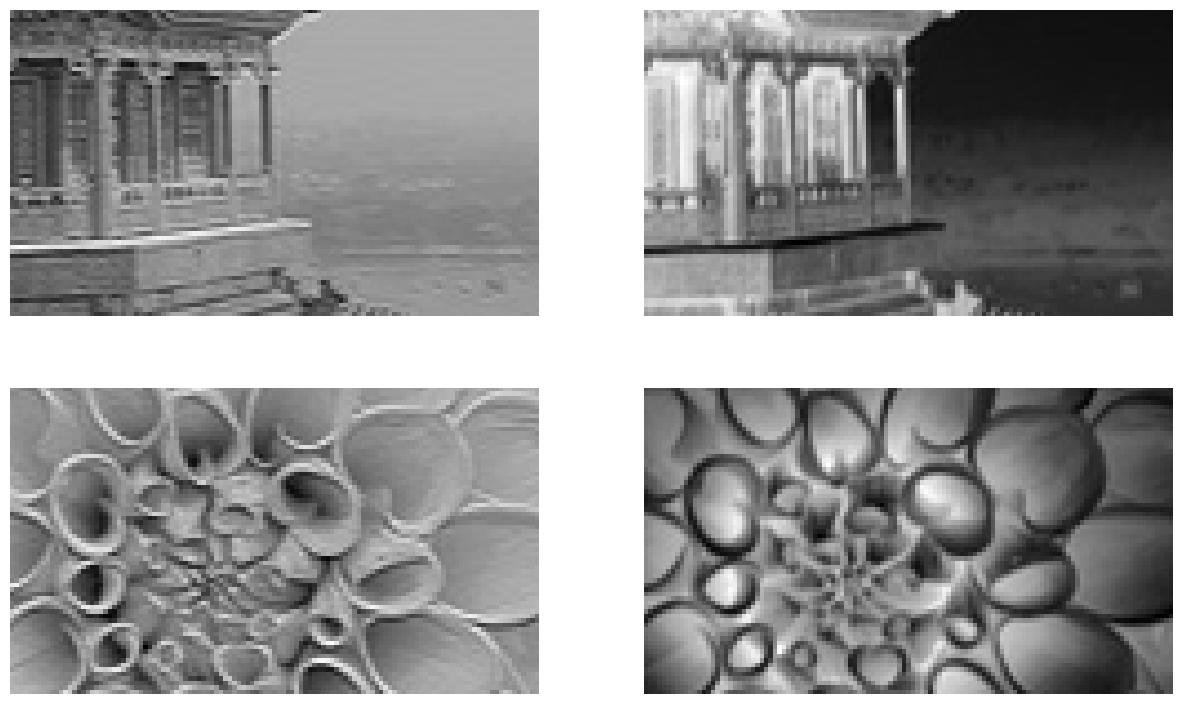

In [ ]:
plt.figure(figsize = (15, 9))
for image_idx in (0, 1):
  for fmap_idx in (0, 1):
    plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
    plt.imshow(fmaps[image_idx, :, :,fmap_idx], cmap = 'gray')
    plt.axis('off')

plt.show()

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters = 32, kernel_size = 7,
                                    padding = 'same')
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters = 32, kernel_size = 7, padding = 'same',
                                    strides = 2)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
import numpy as np
def conv_output_size(input_size, kernel_size, strides = 1, padding = "valid"):
  if padding =='valid':
    z = input_size - kernel_size + strides
    output_size = z // strides
    num_ignored = z % strides
    return output_size, num_ignored
  else:
    output_size = (input_size - 1) // strides + 1
    num_padded = (output_size - 1) * strides + kernel_size - input_size
    return  output_size, num_padded

conv_output_size(np.array([70, 120]), kernel_size = 10, strides = 4,
                   padding = "same")

(array([18, 30]), array([8, 6]))

In [ ]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
tf.random.set_seed(42)
filters = tf.random.normal([7, 7, 3, 2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding='SAME') + biases

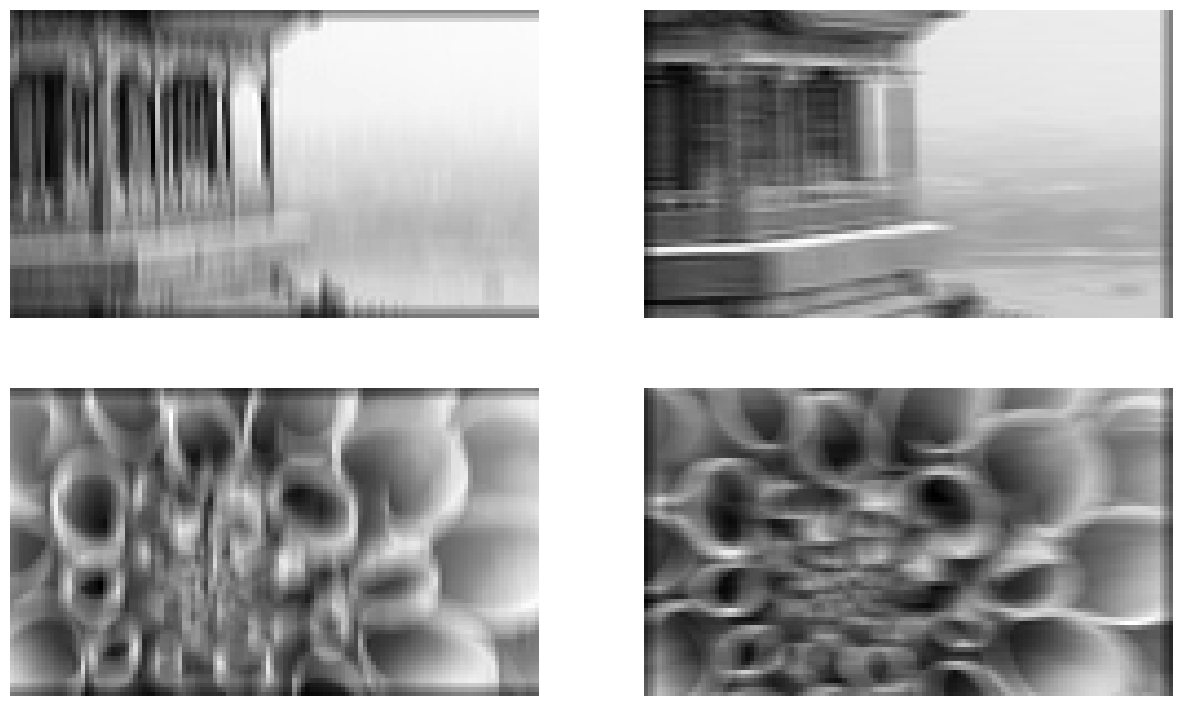

In [ ]:
plt.figure(figsize=(15, 9))
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
fmaps = tf.nn.conv2d(images, filters, strides=1, padding='SAME') + biases
for image_idx in (0, 1):
  for fmap_idx in (0, 1):
    plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap='gray')
    plt.axis('off')

plt.show()


# Max Pooling

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output = max_pool(images)

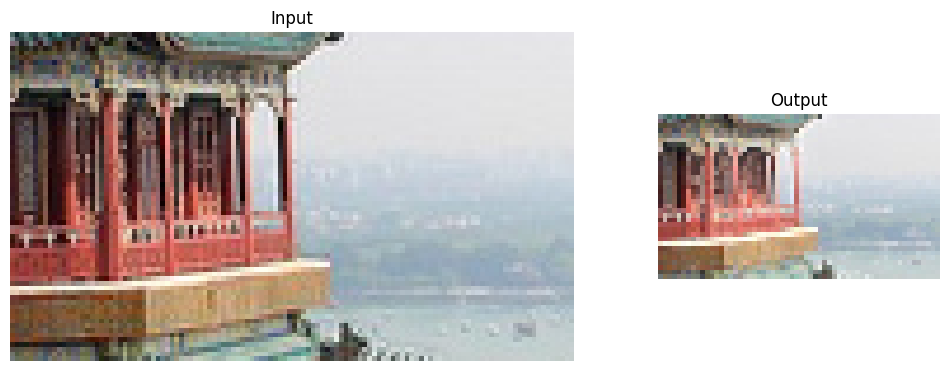

In [ ]:
import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1= fig.add_subplot(gs[0, 0])
ax1.set_title("Input")
ax1.imshow(images[0])
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output")
ax2.imshow(output[0])
ax2.axis('off')
plt.show()

In [ ]:
class DepthPool(tf.keras.layers.Layer):
  def __init__(self, pool_size=2, **kwargs):
    super().__init__(**kwargs)
    self.pool_size=pool_size

  def call(self, inputs):
    shape = tf.shape(inputs)
    groups = shape[-1] // self.pool_size
    new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
    return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

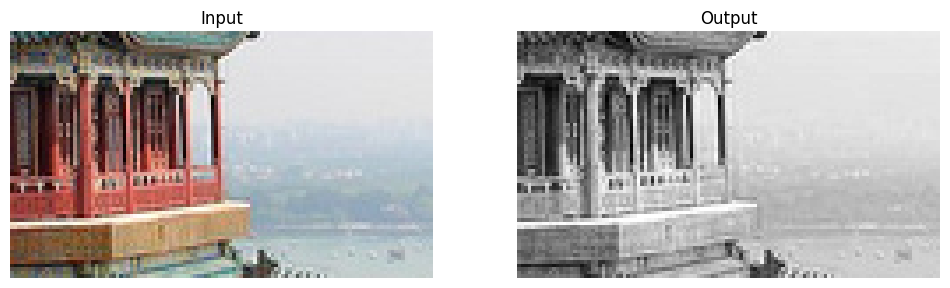

In [ ]:
depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('Input')
plt.imshow(images[0])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Output')
plt.imshow(depth_output[0, ..., 0], cmap='gray')
plt.axis('off')
plt.show()

#CNN Architectures

Tacking Fashion MNIST With a CNN

In [ ]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from functools import partial

tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, padding = 'same',
                        activation = 'relu', kernel_initializer = 'he_normal')

model = tf.keras.Sequential([
    DefaultConv2D(filters = 64, kernel_size = 7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 128),
    DefaultConv2D(filters = 128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 128),
    DefaultConv2D(filters = 128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam',
              metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.6285 - loss: 1.0559 - val_accuracy: 0.8634 - val_loss: 0.3734
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8513 - loss: 0.4395 - val_accuracy: 0.8746 - val_loss: 0.3417
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8743 - loss: 0.3702 - val_accuracy: 0.8904 - val_loss: 0.3080
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8932 - loss: 0.3188 - val_accuracy: 0.8940 - val_loss: 0.2998
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9014 - loss: 0.2923 - val_accuracy: 0.9014 - val_loss: 0.2688
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9081 - loss: 0.2711 - val_accuracy: 0.9094 - val_loss: 0.2556
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9124 - loss: 0.2526 - val_accuracy: 0.9082 - val_loss: 0.2576
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9145 - loss: 0

#Implementing a ResNet-34 CNN Using Keras

In [ ]:
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, strides = 1,
                        padding = 'same', kernel_initializer = 'he_normal',
                        use_bias = False)
class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self, filters, strides=1, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.activation = tf.keras.activations.get(activation)
    self.main_layers = [
        DefaultConv2D(filters, strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
          DefaultConv2D(filters, kernel_size=1, strides=strides),
          tf.keras.layers.BatchNormalization()
      ]

  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
      skip_Z = layer(skip_Z)
    return self.activation(Z + skip_Z)

In [ ]:
model = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size = 7, strides= 2, input_shape = [224, 224, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3, strides=2, padding = 'same')
])
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Using Pretrained Models from Keras

In [ ]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
images = load_sample_images()['images']
images_resized = tf.keras.layers.Resizing(height = 224, width = 224,
                                          crop_to_aspect_ratio = True)(images)

In [ ]:
inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)

In [ ]:
Y_proba = model.predict(inputs)
Y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(2, 1000)

In [ ]:
Y_proba

array([[5.3595897e-07, 8.1552542e-05, 7.4939276e-06, ..., 5.6788362e-08,
        1.1921627e-04, 2.3534758e-05],
       [1.5941718e-07, 7.7845296e-05, 2.1639443e-07, ..., 6.2884892e-06,
        1.2104861e-05, 1.4500227e-05]], dtype=float32)

In [ ]:
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top = 3)
for image_index in range(len(images)):
  print(f'Image #{image_index}')
  for class_id, name, y_proba in top_K[image_index]:
    print(f' {class_id} - {name:12s} {y_proba:.2%}')

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image #0
 n03598930 - jigsaw_puzzle 30.68%
 n02782093 - balloon      17.17%
 n03888257 - parachute    5.57%
Image #1
 n04209133 - shower_cap   34.37%
 n09229709 - bubble       11.41%
 n02782093 - balloon      9.46%


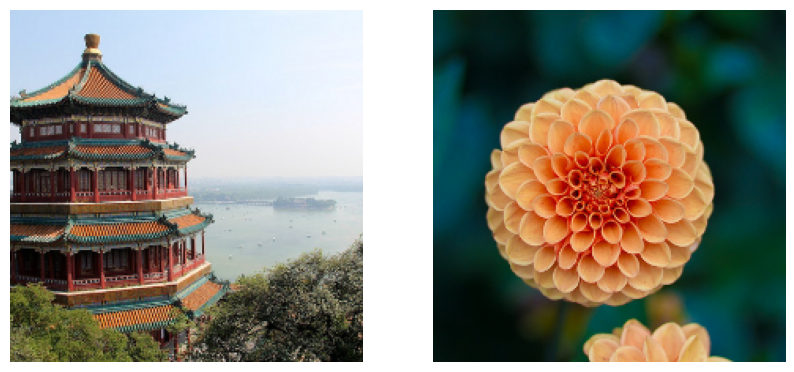

In [ ]:
plt.figure(figsize = (10, 6))
for idx in (0, 1):
  plt.subplot(1, 2, idx+1)
  plt.imshow(images_resized[idx] / 255)
  plt.axis('off')

plt.show()

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True
)

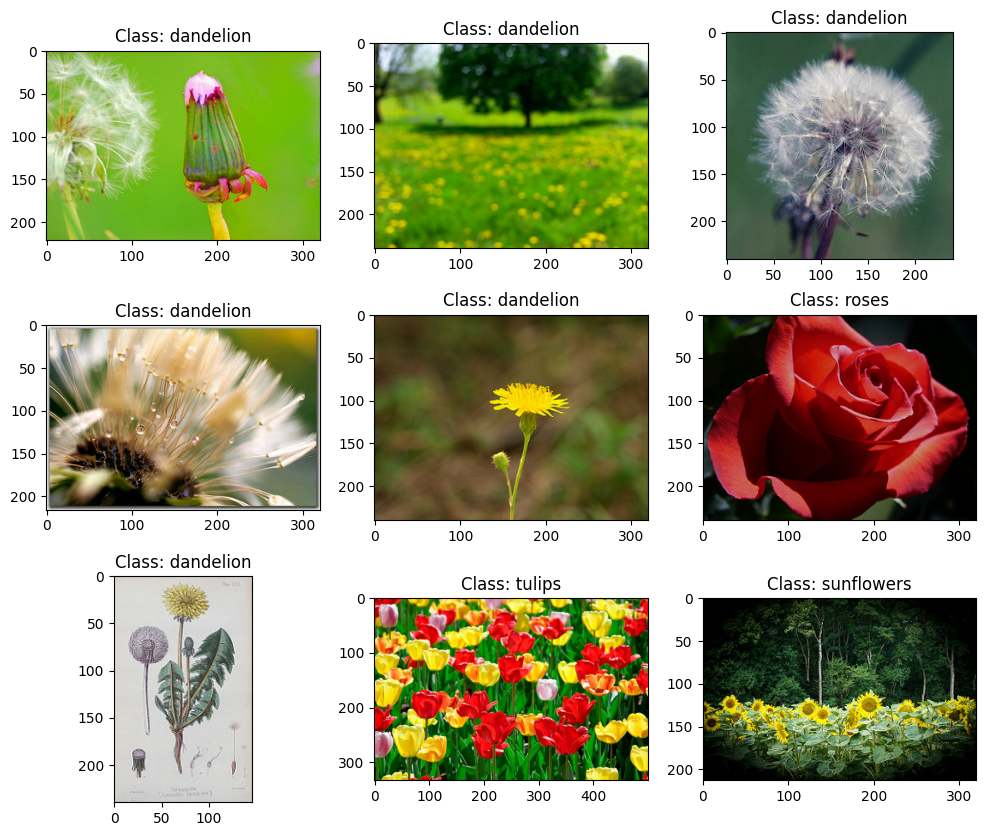

In [ ]:
plt.figure(figsize = (12, 10))
index = 0
for image, label in valid_set_raw.take(9):
  index+=1
  plt.subplot(3, 3, index)
  plt.imshow(image)
  plt.title(f'Class: {class_names[label]}')

plt.show()

In [ ]:
tf.keras.backend.clear_session()
batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

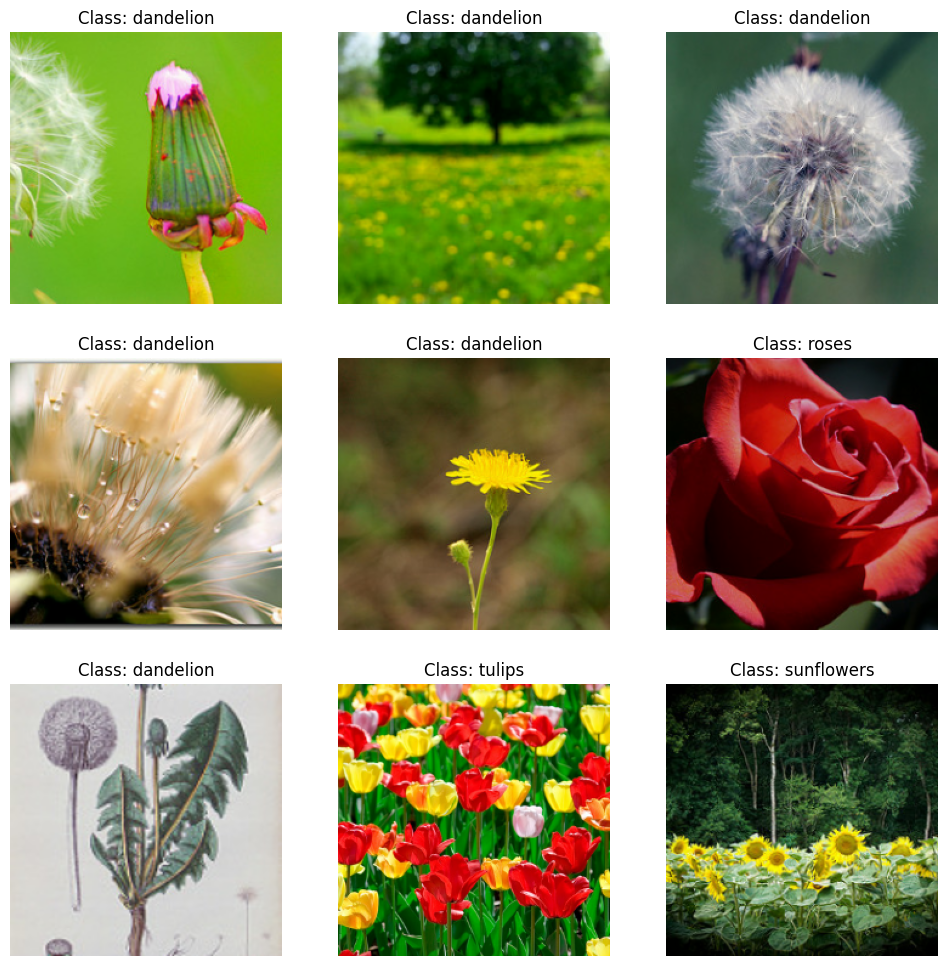

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
  for index in range(9):
    plt.subplot(3, 3, index+1)
    plt.imshow((X_batch[index] +1) / 2)
    plt.title(f'Class: {class_names[y_batch[index]]}')
    plt.axis('off')

plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode = 'horizontal', seed = 42),
    tf.keras.layers.RandomRotation(factor = 0.05, seed=42),
    tf.keras.layers.RandomContrast(factor = 0.2, seed = 42)
])

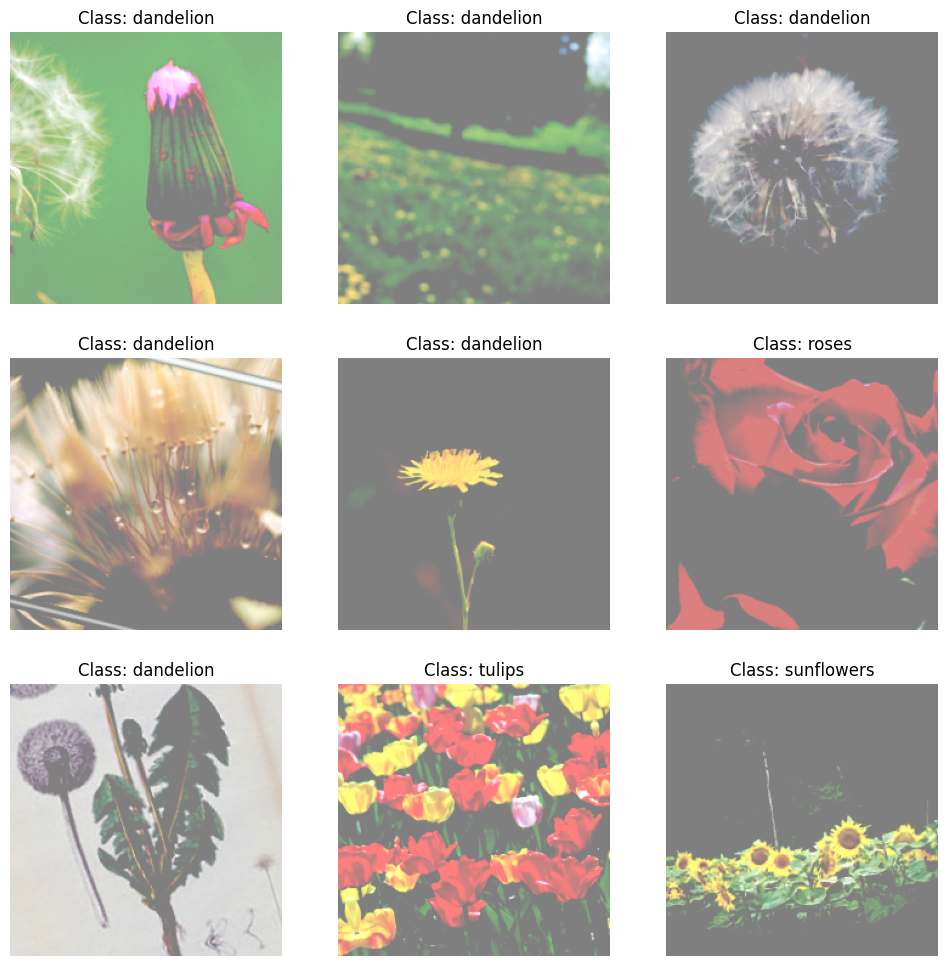

In [ ]:
plt.figure(figsize = (12, 12))
for X_batch, y_batch in valid_set.take(1):
  X_batch_augmented = data_augmentation(X_batch, training = True)
  for index in range(9):
    plt.subplot(3, 3, index+1)
    # We must rescale the images to the 0-1 range for imshow(), and also
    # clip the result to that range, because data augmentation may
    # make some values go out of bounds (e.g. RandomContrast in this case).
    plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
    plt.title(f'Class: {class_names[y_batch[index]]}')
    plt.axis('off')

plt.show()

In [ ]:
tf.random.set_seed(42)
base_model = tf.keras.applications.xception.Xception(include_top = False,
                                                     weights = 'imagenet')
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation='softmax')(avg)
model = tf.keras.Model(inputs = base_model.input, outputs = output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum = 0.9)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(train_set, validation_data = valid_set, epochs=3)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.6973 - loss: 1.0104 - val_accuracy: 0.8530 - val_loss: 0.7181
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.8973 - loss: 0.4161 - val_accuracy: 0.8512 - val_loss: 0.6952
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.9287 - loss: 0.2237 - val_accuracy: 0.8566 - val_loss: 0.6920


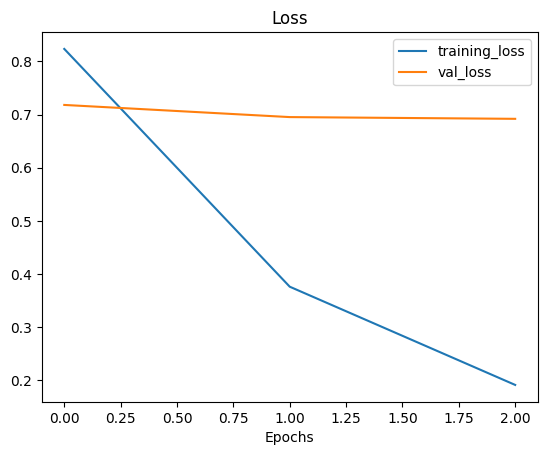

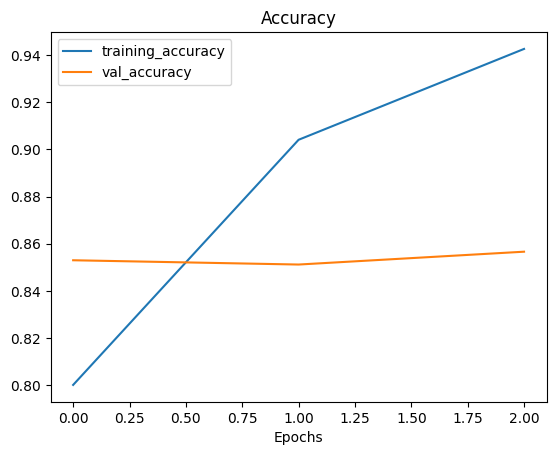

In [ ]:
plot_loss_curves(history)

In [ ]:
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132)):
  for idx in indices:
    print(f'{idx:3}: {base_model.layers[idx].name:22}', end='')
  print()

  0: input_layer_2          33: block4_pool            66: block8_sepconv1_act    99: block11_sepconv2_act  
  1: block1_conv1           34: batch_normalization_2  67: block8_sepconv1       100: block11_sepconv2      
  2: block1_conv1_bn        35: add_2                  68: block8_sepconv1_bn    101: block11_sepconv2_bn   
  3: block1_conv1_act       36: block5_sepconv1_act    69: block8_sepconv2_act   102: block11_sepconv3_act  
  4: block1_conv2           37: block5_sepconv1        70: block8_sepconv2       103: block11_sepconv3      
  5: block1_conv2_bn        38: block5_sepconv1_bn     71: block8_sepconv2_bn    104: block11_sepconv3_bn   
  6: block1_conv2_act       39: block5_sepconv2_act    72: block8_sepconv3_act   105: add_9                 
  7: block2_sepconv1        40: block5_sepconv2        73: block8_sepconv3       106: block12_sepconv1_act  
  8: block2_sepconv1_bn     41: block5_sepconv2_bn     74: block8_sepconv3_bn    107: block12_sepconv1      
  9: block2_sepconv

In [ ]:
for layer in base_model.layers[56:]:
  layer.trainable=True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(train_set, validation_data = valid_set, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 58s 397ms/step - accuracy: 0.8734 - loss: 0.3903 - val_accuracy: 0.8475 - val_loss: 0.7350
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 323ms/step - accuracy: 0.9744 - loss: 0.0811 - val_accuracy: 0.9056 - val_loss: 0.3782
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 333ms/step - accuracy: 0.9955 - loss: 0.0162 - val_accuracy: 0.9111 - val_loss: 0.3716
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9183 - val_loss: 0.2900
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9165 - val_loss: 0.3029
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.9997 - loss: 0.0027 - val_accuracy: 0.9183 - val_loss: 0.3140
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9165 - val_loss: 0.3247
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 335ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accu

In [ ]:
plot_loss_curves(history)

NameError: name 'plot_los_curves' is not defined

In [ ]:
#Classification and Localization